In [45]:
import pandas as pd
import numpy as np

import answer_loc_prediction as PM
from importlib import reload
reload(PM)
import constants as C

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

In [46]:
hunters = pd.read_csv("output_data/hunters.csv")
gatherers = pd.read_csv("output_data/gatherers.csv")

In [47]:
def show_model_results(results, labels=(0, 1, 2, 3)):
    """
    Pretty-print evaluation results from evaluate_models_on_answer_location().
    """
    for model_name, res in results.items():
        print("=" * 70)
        print(f"MODEL: {model_name}")
        print("-" * 70)

        acc = res["accuracy"]
        n = res["n_test"]
        y_true = np.asarray(res["y_true"])
        y_pred = np.asarray(res["y_pred"])

        print(f"Number of test trials: {n}")
        print(f"Accuracy: {acc:.3f}\n")

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=list(labels))
        cm_df = pd.DataFrame(
            cm,
            index=[f"true_{l}" for l in labels],
            columns=[f"pred_{l}" for l in labels],
        )
        print("Confusion Matrix:")
        print(cm_df.to_string())
        print()

        # True label distribution
        true_counts = (
            pd.Series(y_true)
            .value_counts()
            .sort_index()
            .rename("count")
        )
        print("True label distribution (label → count):")
        print(true_counts.to_string())
        print()

        # Prediction distribution
        pred_counts = (
            pd.Series(y_pred)
            .value_counts()
            .sort_index()
            .rename("count")
        )
        print("Prediction distribution (label → count):")
        print(pred_counts.to_string())
        print()

In [48]:
def plot_confusion_heatmap(y_true, y_pred,
                           labels=(0, 1, 2, 3),
                           include_minus1=False,
                           normalize=False,
                           title="Confusion matrix"):
    """
    Plot a seaborn heatmap for the confusion matrix.
    If include_minus1=True, a -1 row/column is added for invalid predictions.
    """
    if include_minus1:
        labels = (-1,) + tuple(labels)

    cm = confusion_matrix(y_true, y_pred, labels=list(labels))

    if normalize:
        # row-normalise (per true class)
        cm = cm.astype(float)
        row_sums = cm.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1.0
        cm = cm / row_sums

    index_names = [f"true_{l}" for l in labels]
    col_names   = [f"pred_{l}" for l in labels]
    cm_df = pd.DataFrame(cm, index=index_names, columns=col_names)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_df,
        annot=True,
        fmt=".2f" if normalize else "d",
        cmap="Blues"
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [49]:
models = [PM.LastLocationBaseline()]

results_h = PM.evaluate_models_on_answer_location(
    hunters,
    models=models,
    group_cols=(C.PARTICIPANT_ID, C.TRIAL_ID),
    split_group_col=C.PARTICIPANT_ID,
    last_loc_col=C.LAST_VISITED_LOCATION,
    target_col=C.SELECTED_ANSWER_POSITION_COLUMN,
    test_size=0.2,
    random_state=42,
)

results_g = PM.evaluate_models_on_answer_location(
    gatherers,
    models=models,
    group_cols=(C.PARTICIPANT_ID, C.TRIAL_ID),
    split_group_col=C.PARTICIPANT_ID,
    last_loc_col=C.LAST_VISITED_LOCATION,
    target_col=C.SELECTED_ANSWER_POSITION_COLUMN,
    test_size=0.2,
    random_state=42,
)

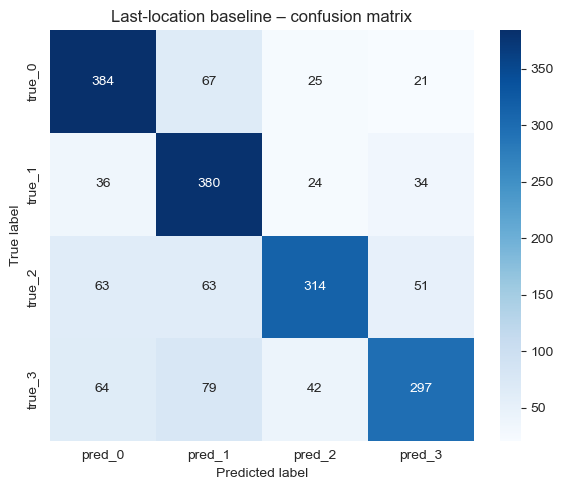

In [54]:
res = results_g["last_location"]
y_true = res["y_true"]
y_pred = res["y_pred"]

# Standard (0–3 only)
plot_confusion_heatmap(
    y_true, y_pred,
    labels=(0, 1, 2, 3),
    include_minus1=False,
    normalize=False,
    title="Last-location baseline – confusion matrix"
)


In [52]:
show_model_results(results_g)

MODEL: last_location
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.707

Confusion Matrix:
        pred_0  pred_1  pred_2  pred_3
true_0     384      67      25      21
true_1      36     380      24      34
true_2      63      63     314      51
true_3      64      79      42     297

True label distribution (label → count):
0    497
1    474
2    491
3    482

Prediction distribution (label → count):
0    547
1    589
2    405
3    403

